#### Here's an example that demonstrates use pf "classification report" using scikit-learn library and manipulation of precision and recall values ####

In [1]:
# import modules

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
# Load the breast cancer data set from sklearn's dataset repository
# There are 30 features for each data point

bc = datasets.load_breast_cancer() # Load the breast cancer data set
X, y = bc.data, bc.target # Seperate the data (feature) and target (label) columns
print(f"Shape of X:\n{X.shape}\n\nLook at Row 1:\n{X[:1]}") # Print the shape of X and the first row of X


Shape of X:
(569, 30)

Look at Row 1:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]


In [3]:
# The values in the 30 columns each have varying magnitudes, which can be problematic for gradient descent
# Therefore we shall feature scale the values using a standard scaler

sc = StandardScaler() # Create a StandardScaler object
X = sc.fit_transform(X) # get a new X with scaled values, so all 30 features are in the same range

# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
# stratify=y shuffles the data in a way that the proportion of the target labels in the training and test sets are the same

In [4]:
model = LogisticRegression() # Create a Logistic Regression model
model.fit(X_train, y_train) # Fit the model to the training data

LogisticRegression()

In [5]:
# Train the model and Generate classification report


y_pred = model.predict(X_test) # genrate predictions on the test data
report = classification_report(y_test, y_pred) # build a classification report

# Print the classification report
target_names = ['class 0', 'class 1'] # Define the target names (class 0 = no cancer, class 1 = cancer)
print(classification_report(y_test, y_pred, target_names=target_names)) # Print the classification report

              precision    recall  f1-score   support

     class 0       0.97      0.92      0.94        64
     class 1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#### __How do we change precision and recall values to build a model suitable for our problem?__ ####
<br><br>

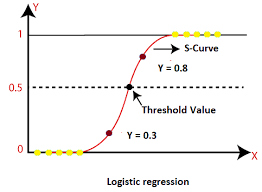

<br><br>

In [6]:
# changing threshold and predicting 
print('prediction with threshold 0.7 :') # Print the prediction with threshold 0.7
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.7).astype(int) # if the probability is greater than 0.7, predict class 1 (cancer)
print(y_pred_new_threshold) # Print the prediction with threshold 0.7


prediction with threshold 0.7 :
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]


In [8]:
# Print the classification report
# Here, you see how the recall increased, but the precision has decreased
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_new_threshold, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95        64
     class 1       0.97      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

